# A preliminary pipeline to collect features

In [14]:
import jusipy
import pandas as pd
import matplotlib.pylab as plt

In [2]:
# Load datasets
LM        = jusipy.deals.LandMatrix()
A_country = jusipy.country_features.All()
A_latlong = jusipy.latlong_features.All()
GLCF_8km  = A_latlong.datasets[2]         # extract from A_latlong, just to not load this one twice...

Loading GLCF(8km)                                                                                                     reas)                                                                                                      

In [3]:
# Load GIS tools
GC = jusipy.GIS.GoogleCode(cache=jusipy.utils.FireDict(sub='googlecode'))
CC = jusipy.GIS.CountryCode()
CLL = jusipy.GIS.CountryLatLong()

## Select the points, and get the relevant data

### Positive points from LandMatrix

In [5]:
positive_points = LM.M[['lat', 'long', 'target_country_iso3', 'negotiation_year']]
positive_points = positive_points.rename(columns={'target_country_iso3' : 'country',
                                                  'negotiation_year' : 'year'})
positive_points['positive'] = 1
positive_points['random']   = 0

### Random points selected from around the earth

In [6]:
random_points = pd.DataFrame(jusipy.GIS.sample.random_latlong(land=True, glcf=GLCF_8km, size=11000),
                             columns=['lat', 'long'])
random_points.to_pickle('data/random_points.pkl')
random_points = pd.read_pickle('data/random_points.pkl')
random_points['country'] = CLL.get(zip(random_points.lat, random_points.long))

random_points['year'] = ['newest'] * len(random_points.lat)
random_points['positive'] = 0
random_points['random']   = 1

random_points = random_points[~pd.isna(random_points.country)]

### Combine the two stacks of data

In [12]:
all_points = pd.concat([positive_points, random_points])
all_points.to_pickle('data/all_points.pkl')
all_points

,lat,long,country,year,positive,random
0,19.8101,93.987843,MMR,2007,1,0
1,22.8724,91.097318,BGD,2003,1,0
2,13.8577,107.101193,KHM,2005,1,0
3,12.4897,106.028751,KHM,2008,1,0
4,12.7879,107.101193,KHM,2009,1,0
5,12.5657,104.990963,KHM,2010,1,0
6,12.6926,104.900925,KHM,2005,1,0
7,14.1717,103.636272,KHM,2008,1,0
8,12.4897,106.028751,KHM,2006,1,0
9,11.8302,106.178679,KHM,NaN,1,0


## Visualize the Spatial data

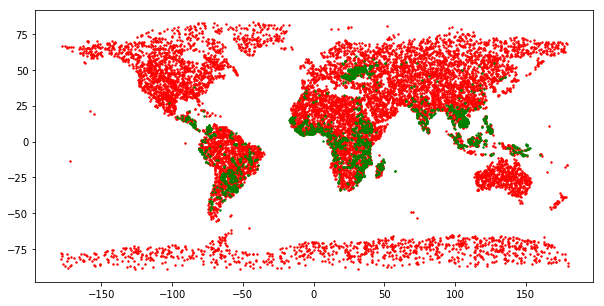

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(all_points.long[all_points.random == 1], all_points.lat[all_points.random ==1], c='r', s=2, zorder=1)

plt.scatter(all_points.long[all_points.random == 0], all_points.lat[all_points.random ==0], c='g', s=2, zorder=2)
#plt.scatter

## Collect features for each point

In [ ]:
country_features = jusipy.country_features.get(all_points, A_country)
latlong_features = jusipy.latlong_features.get(all_points, A_latlong)
all_features = country_features.join(latlong_features)

## Store the output

In [ ]:
all_points.to_pickle('data/all_labels.pkl')
all_features.to_pickle('data/all_features.pkl')

In [9]:
len(GC._cache._cache.keys())

5010

In [12]:
random_points

,lat,long,year,positive,random
0,21.097739,-98.915843,newest,0,1
1,46.687457,64.653645,newest,0,1
2,59.078491,12.060274,newest,0,1
3,-30.945640,-69.034903,newest,0,1
4,14.954319,38.412615,newest,0,1
5,-44.450818,-65.659892,newest,0,1
6,-25.466296,126.171925,newest,0,1
7,-79.398492,139.786460,newest,0,1
8,21.366154,75.127272,newest,0,1
9,20.243429,-100.795276,newest,0,1


In [13]:
random_points.to_pickle('data/10000_random_points.pkl')